<a href="https://colab.research.google.com/github/Staticstic/Data-Analysis-practice/blob/main/Water_Circulation_system_%EC%9D%B4%EC%83%81%ED%83%90%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 데이터 확인 ⬇

|Column|Description|
|:---|:---|
|datetime|시간|
|Accelerometer1RMS|진동 가속도1|
|Accelerometer2RMS|진동 가속도2|
|Current |전기모터 암페어(Ampere)|
|Pressure|워터 펌프 후 루프의 압력(Bar) |
|Temperature|엔진의 온도(섭씨 온도)|
|Thermocouple|순환 루프에서 유체의 온도(섭씨 온도)|
|Voltage|전기 모터의 전압(Volt)|
|RateRMS|루프 내부의 유체의 순환 유량(Liter/min)|
|anomaly|이상여부|
|changepoint|변경점 여부|

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/bytedegree")
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/bytedegree'

In [2]:
# 데이터 불러오기
import pandas as pd
df = pd.read_csv('example_1', sep=";")
df.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


In [3]:
# Row: 1063, Column: 11인 것으로 확인
df.shape

(1063, 11)

In [4]:
# datetime을 제외한 모든 Coulmns가 float64인 것으로 확인
df.dtypes

datetime                object
Accelerometer1RMS      float64
Accelerometer2RMS      float64
Current                float64
Pressure               float64
Temperature            float64
Thermocouple           float64
Voltage                float64
Volume Flow RateRMS    float64
anomaly                float64
changepoint            float64
dtype: object

In [5]:
# Null 값은 없는 것으로 확인
df.isnull().sum()

datetime               0
Accelerometer1RMS      0
Accelerometer2RMS      0
Current                0
Pressure               0
Temperature            0
Thermocouple           0
Voltage                0
Volume Flow RateRMS    0
anomaly                0
changepoint            0
dtype: int64

In [6]:
# anomaly의 비율은 약 31%
df['anomaly'].value_counts(normalize=True)*100

0.0    68.673565
1.0    31.326435
Name: anomaly, dtype: float64

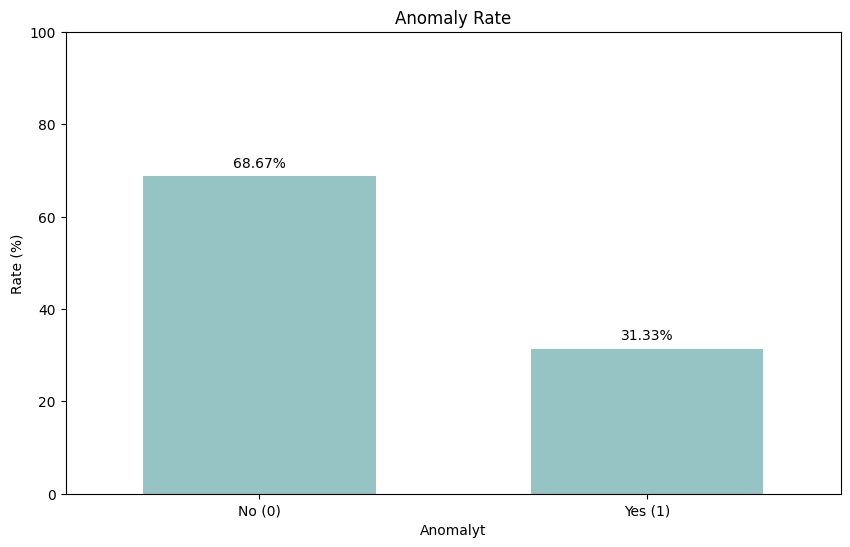

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Anomaly의 비율을 계산
anomaly_rate = (df['anomaly'].value_counts(normalize=True)*100).reset_index()

# barplot 생성
fig, ax = plt.subplots(figsize=(10,6))


sns.barplot(x='index', y='anomaly', data=anomaly_rate, color='#8FCACA', width=0.6)
plt.title('Anomaly Rate')
plt.xlabel('Anomalyt')
plt.ylabel('Rate (%)')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'], rotation=0)

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,
            p.get_y() + p.get_height() + 2,
            f"{p.get_height():.2f}%",
            ha = 'center' )
ax.set_ylim(0, 100)
plt.show()

In [8]:
# datetime 변수 시간형으로 변경
df['datetime'] = pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S')

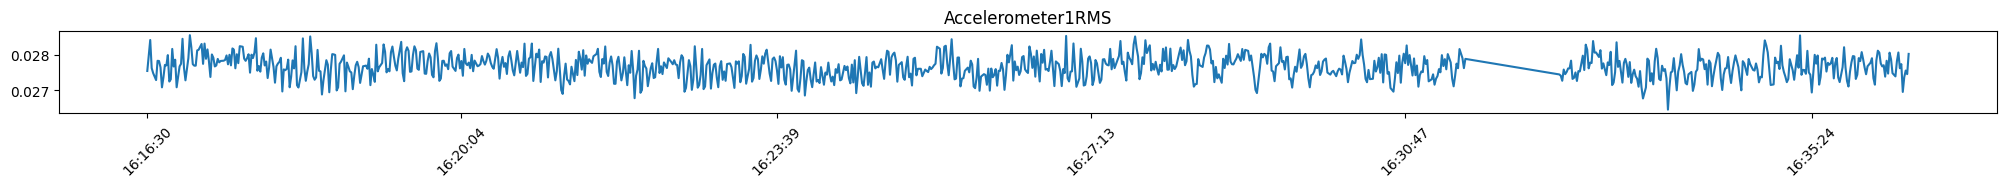

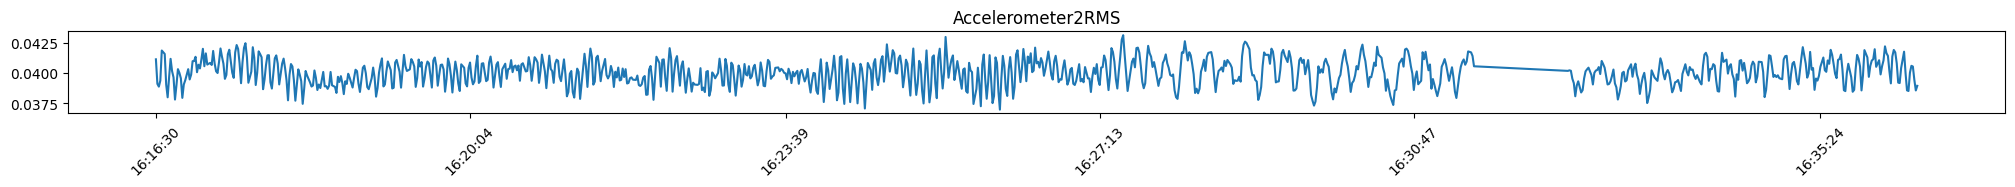

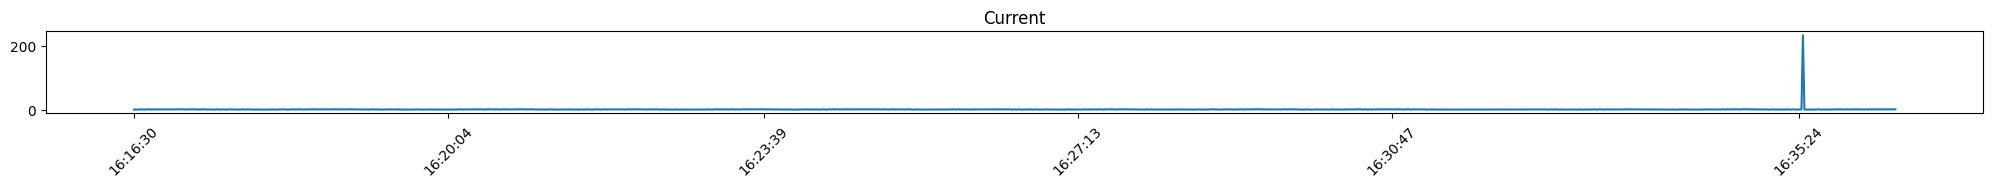

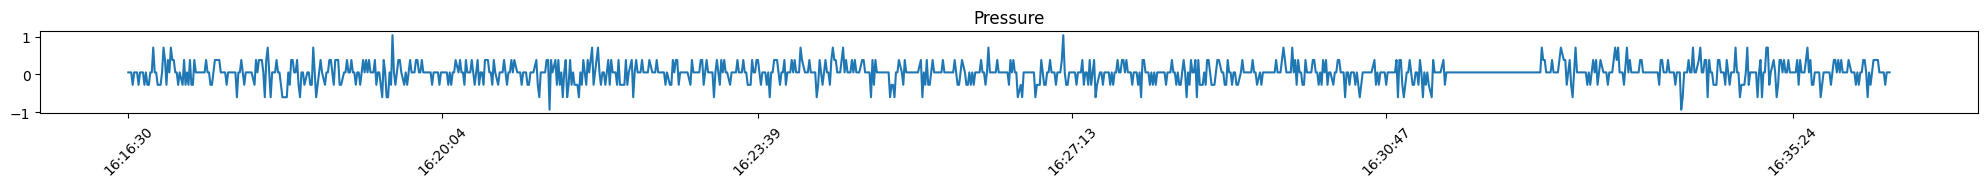

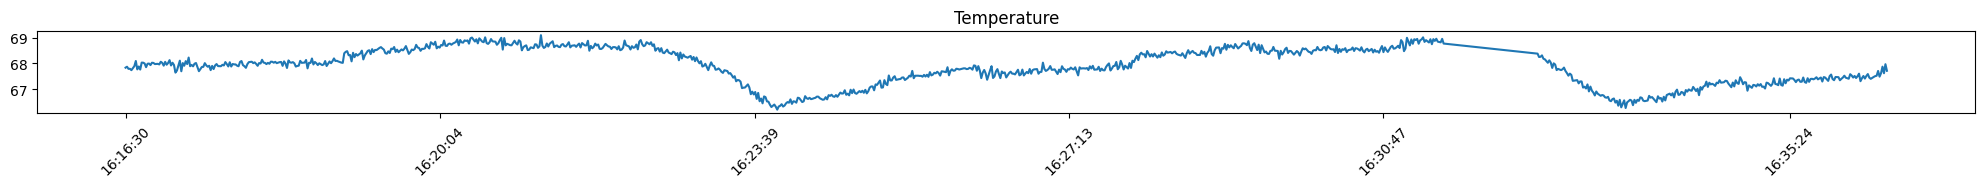

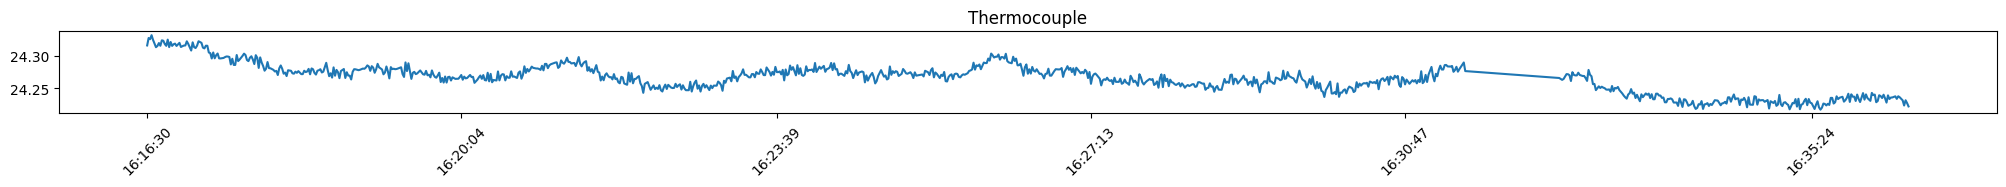

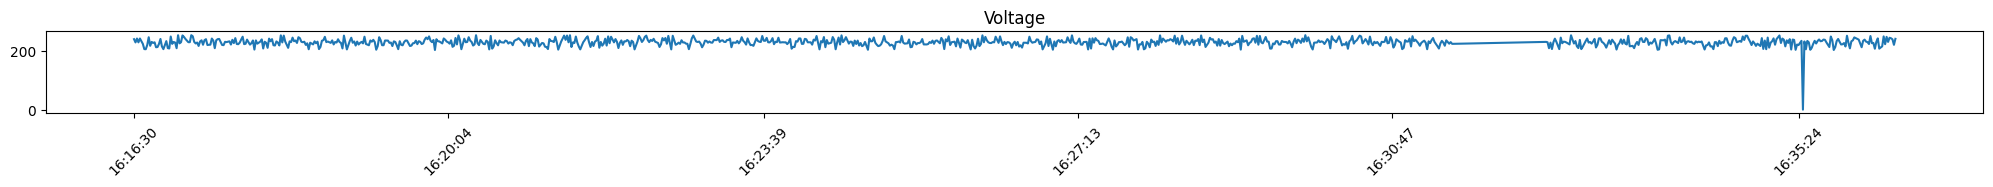

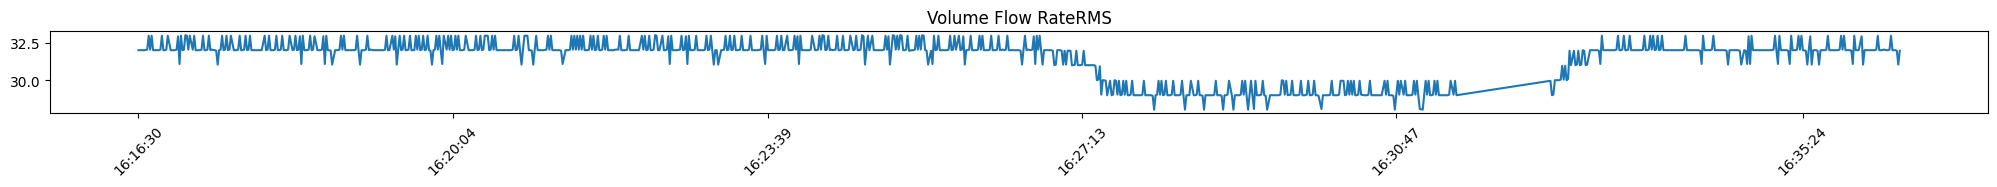

In [9]:
# 'Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS'

# Columns 따로 추출
col_name = ['Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS']

# x축 라벨 일부만 설정 (예: 첫 번째, 세 번째, 마지막 날짜만 표시)
selected_dates = df['datetime'][[0, 200, 400, 600, 800, 1000]]
selected_labels = ['16:16:30', '16:20:04', '16:23:39', '16:27:13', '16:30:47', '16:35:24']

# trend 그래프 생성
for v, i in  enumerate(df[col_name]) :
  plt.figure(figsize=(25,10))
  plt.subplot(8, 1, v+1)
  plt.plot(df['datetime'], df[i], '-');
  plt.xticks(selected_dates, labels=selected_labels, rotation=45)
  plt.title(i)

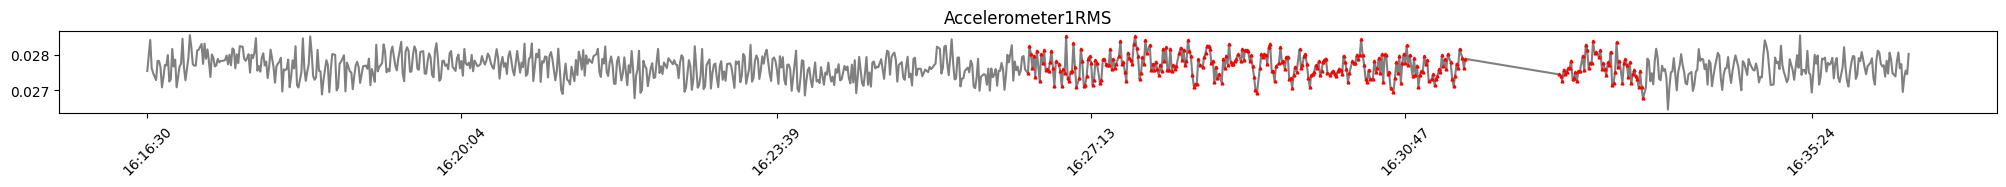

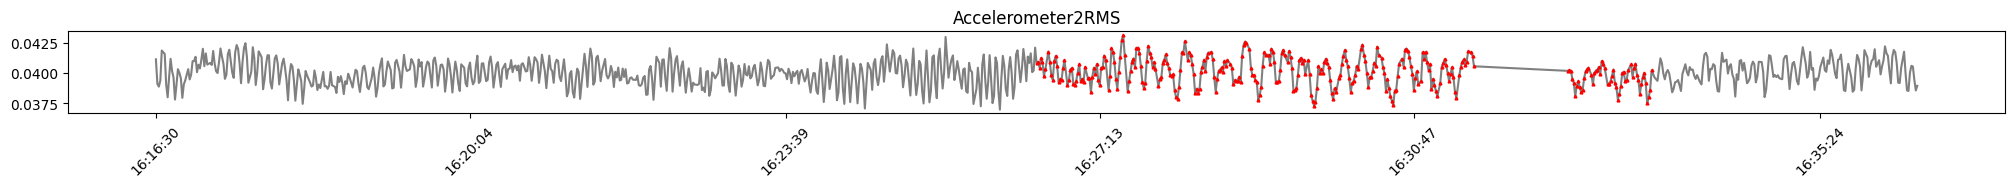

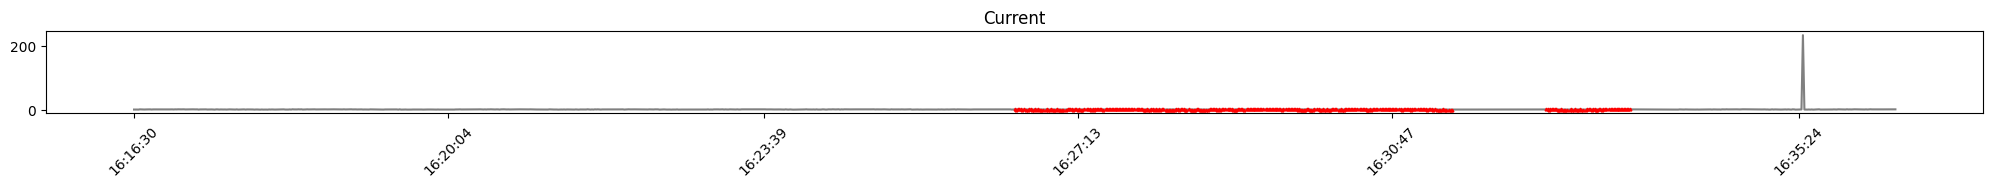

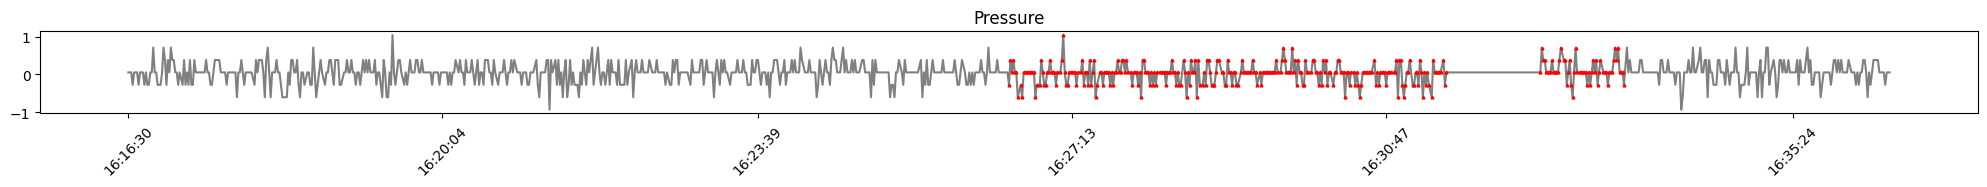

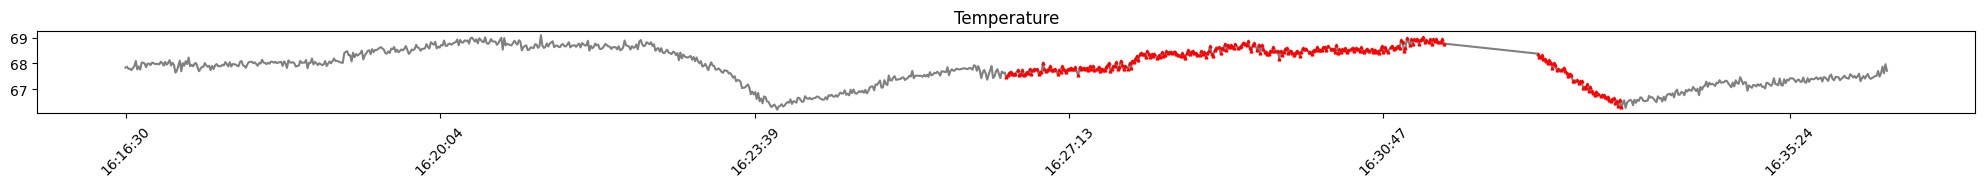

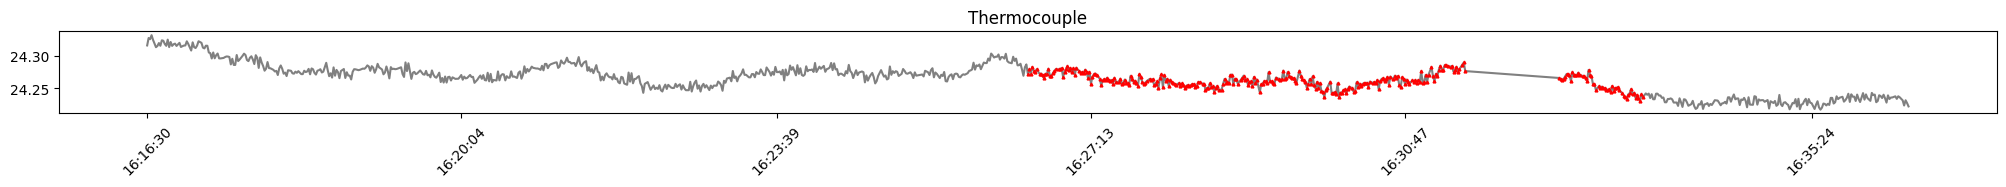

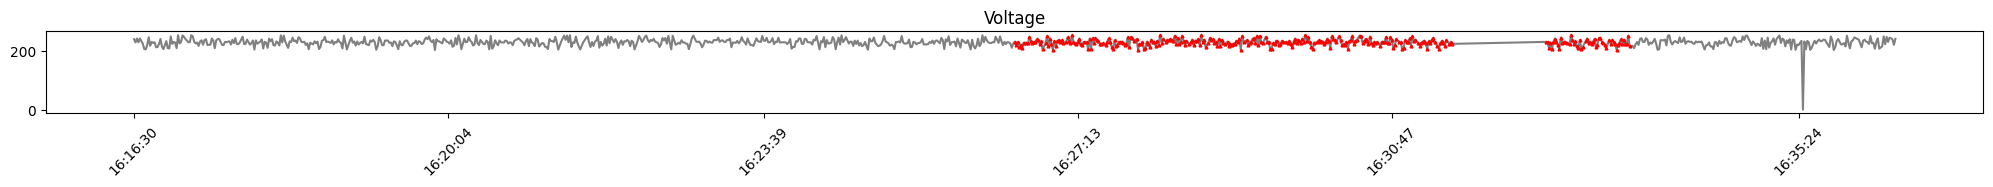

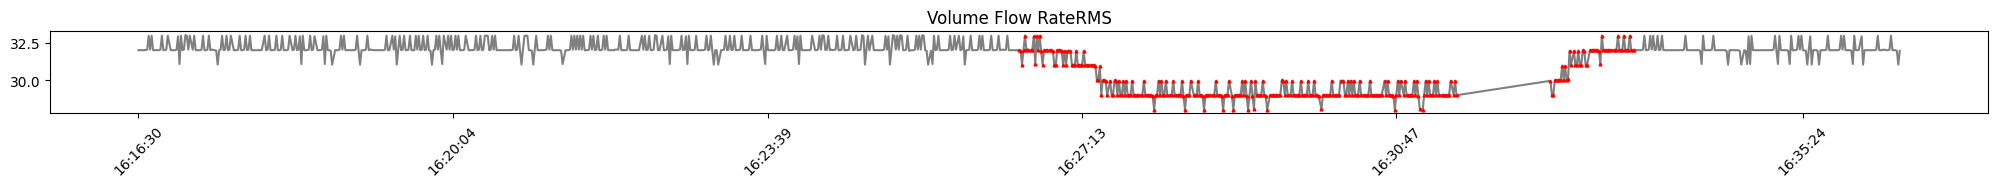

In [11]:
 # Trend 그래프 위에 'anomaly'가 1인 데이터에 대해서 이상 포인트를 표시

 # anomaly=1인 경우만 따로 추출한 df 생성
 df_anomaly = df.loc[df['anomaly']==1]

 # trend 그래프 생성
 for v, i in  enumerate(df[col_name]) :
  plt.figure(figsize=(25,10))
  plt.subplot(8, 1, v+1)
  plt.plot(df['datetime'], df[i], '-', color='gray');
  plt.plot(df_anomaly['datetime'], df_anomaly[i], '^', color='red', markersize=2);
  plt.xticks(selected_dates, labels=selected_labels, rotation=45)
  plt.title(i)

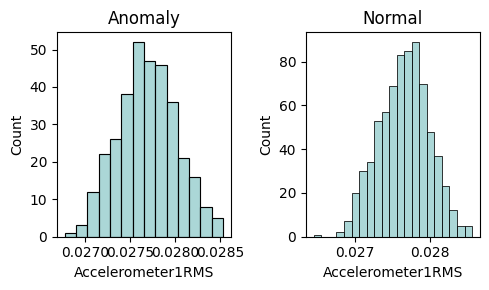

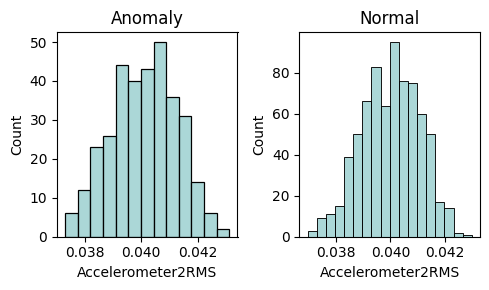

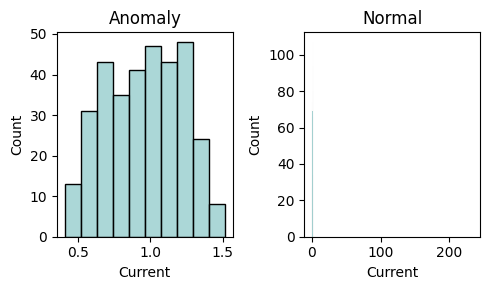

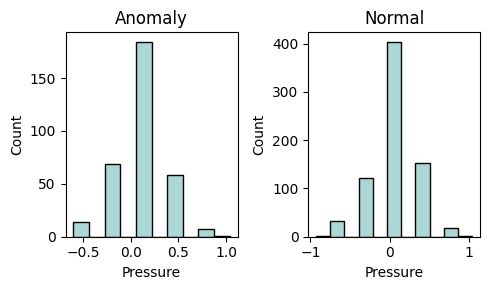

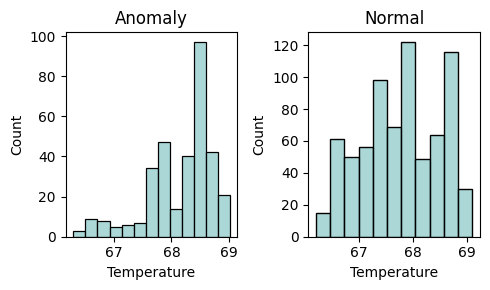

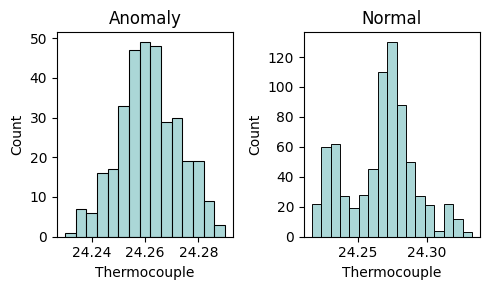

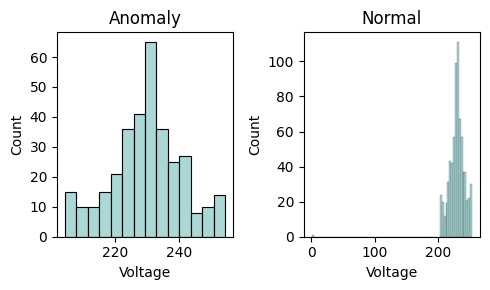

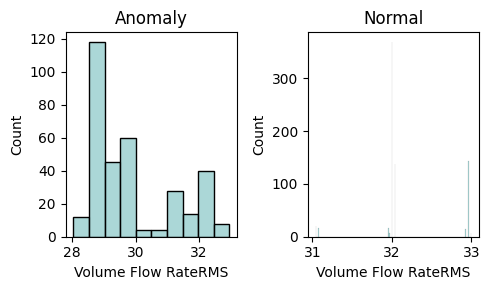

In [12]:
# 일반 데이터와 anomaly 데이터 분리
df_anomaly = df.loc[df['anomaly'] == 1]
df_normal = df.loc[df['anomaly'] == 0]


# 이상 vs 정상 데이터 시각화
for col in df[col_name]:

  plt.figure(figsize=(5, 3))
  # 이상 데이터
  plt.subplot(1, 2, 1)
  sns.histplot(df_anomaly[col], color='#8FCACA')
  plt.title('Anomaly')

  # 정상 데이터
  plt.subplot(1, 2, 2)
  sns.histplot(df_normal[col], color='#8FCACA')
  plt.title('Normal')

  plt.tight_layout()
  plt.show()

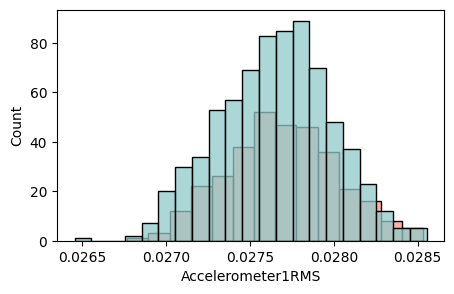

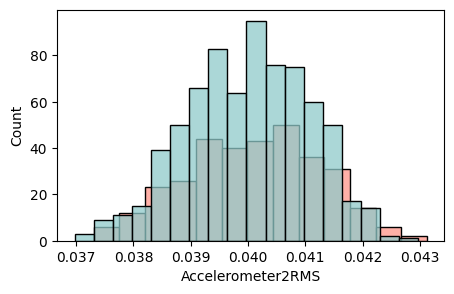

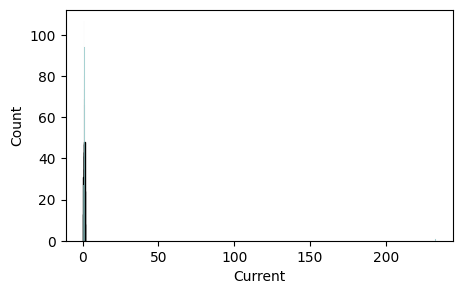

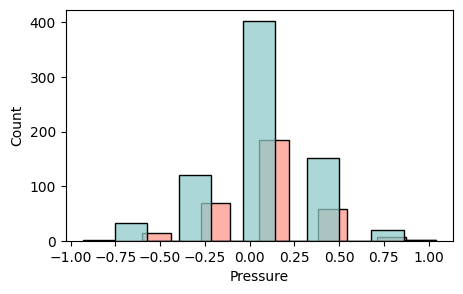

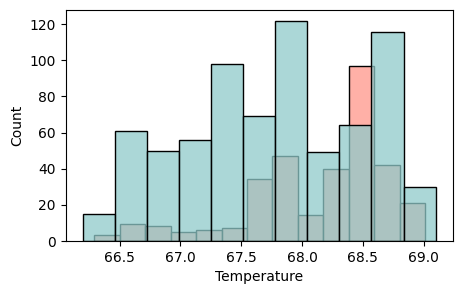

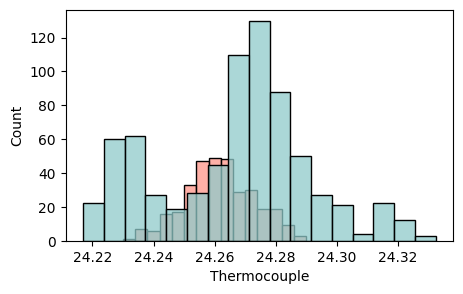

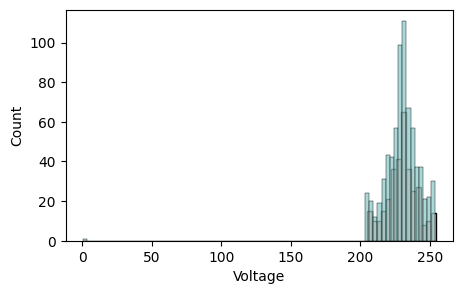

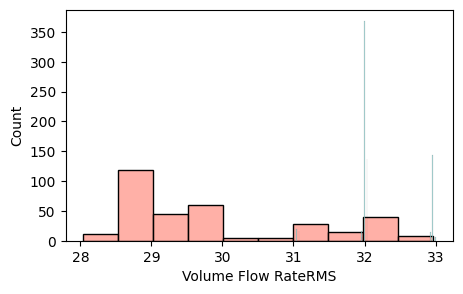

In [13]:
# 정상, 비정상 데이터를 하나의 그래프로 나타내서 조금 더 확인하기 쉽도록 파악

for col in df[col_name]:

  plt.figure(figsize=(5, 3))
  sns.histplot(df_anomaly[col], color='#FF968A')
  sns.histplot(df_normal[col], color='#8FCACA')

  plt.show()

그래프를 통해 정상 vs 이상 데이터에서 Current, Thermocouple, Volume Flow Rate 가 차이가 있는 것으로 의심된다.